In [1]:
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
import textwrap

# 폰트 설정
font_path = "C:\\Users\\이진호\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
file_path = 'C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\01.files\\공간정보 기능조사.xlsx'

sheet_name = pd.ExcelFile(file_path).sheet_names[-1]  # 내용결론 시트 가져오기
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols='E:I', skiprows=1, nrows=11)   # 필요한 부분 가져오기
df.columns = [re.sub(r'[^가-힣]', '', col) for col in df.columns]   # 열 이름 수정
df['키워드'] = df['키워드'].str.replace('\n', '')   # 키워드값 수정
df['키워드'].fillna(method='ffill', inplace=True)   # 결측치 처리
df['순번'] = df.groupby('키워드').cumcount() + 1    # 순번 재조정

display(df)

data = {}
for i in range(len(df)):
    d = df.iloc[i]
    # 딕셔너리 키 이름 지정
    key = d['중요도'] + ': ' + d['키워드']

    # 기존 키가 없으면 새로운 키 추가
    if key not in data:
        data[key] = []
    data[key].append((str(d['순번']) + '.' + d['관련내용'], d['기대효과']))

C:\Users\이진호\AppData\Local\Temp\ipykernel_39944\4234579780.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['키워드'].fillna(method='ffill', inplace=True)   # 결측치 처리


,키워드,순번,관련내용,기대효과,중요도
0,내부직원 및 편리,1,"플랫폼 내 기술, 정책 페이지 개설을 통해 최신 기술 소개+설명 및 관련 기술 개발...",직원들의 편리함↑+가장 필요로 하는 기술,1순위
1,내부직원 및 편리,2,"각 담당자, 해당 사업명, 결과보고서를 한번에 알 수 있도록 직원들 현 상황을 파악...","직원들의 편리함↑, but 내부망 보안으로 실현 가능성↓",1순위
2,데이터 시각화,1,자동 시각화 템플릿 생성 기능,데이터 처리 능률↑,2순위
3,데이터 시각화,2,데이터의 시간축 기반 분석,데이터 처리 능률↑,2순위
4,데이터 시각화,3,레이어 중첩 기능,데이터 처리 능률↑+보조의 역할일 뿐,2순위
5,민원 보조,1,예약을 받는 예약서비스 추가하는 방법,민원 전화↓,3순위
6,민원 보조,2,사용자와 협력할 수 있는 공간정보 DB를 동시에 다룰 수 있는 공동 작업 기능,추가적인 정보 습득+편리성↑,3순위
7,민원 보조,3,분석모델의 접근성과 활용성을 높이기 위해 로그인 없이도 조회가 가능하도록 함,궁금증 해결 및 이용량 증가,3순위
8,흥미유발,1,가상 도시 설계로 관련 전공학과 대학생의 실습 자료 등으로도 활용,다양한 이용자 확보 가능+관련 지원자 증가 가능성↑,4순위
9,흥미유발,2,"가상 관광으로 여행, 역사적 장소 탐방 등 다양한 경험을 제공받을 수 있게 함",홍보 효과+플랫폼 이용자 증가,4순위


In [3]:
# 그래프 생성 함수
def create_graph(data):
    graph = nx.Graph()

    # 노드와 엣지 추가
    for category, items in data.items():
        graph.add_node(category, size=4000, color="lightblue")  # 키워드 노드
        for content, effect in items:
            graph.add_node(content, size=6000, color="lightgray")  # 관련 내용 노드
            graph.add_node(effect, size=5000, color="lightgreen")  # 기대효과 노드
            graph.add_edge(category, content)  # 키워드 → 관련 내용
            graph.add_edge(content, effect)   # 관련 내용 → 기대효과
    return graph

# 텍스트 개행 처리 함수
def wrap_text(text, width=15):
    return "\n".join(textwrap.wrap(text, width))

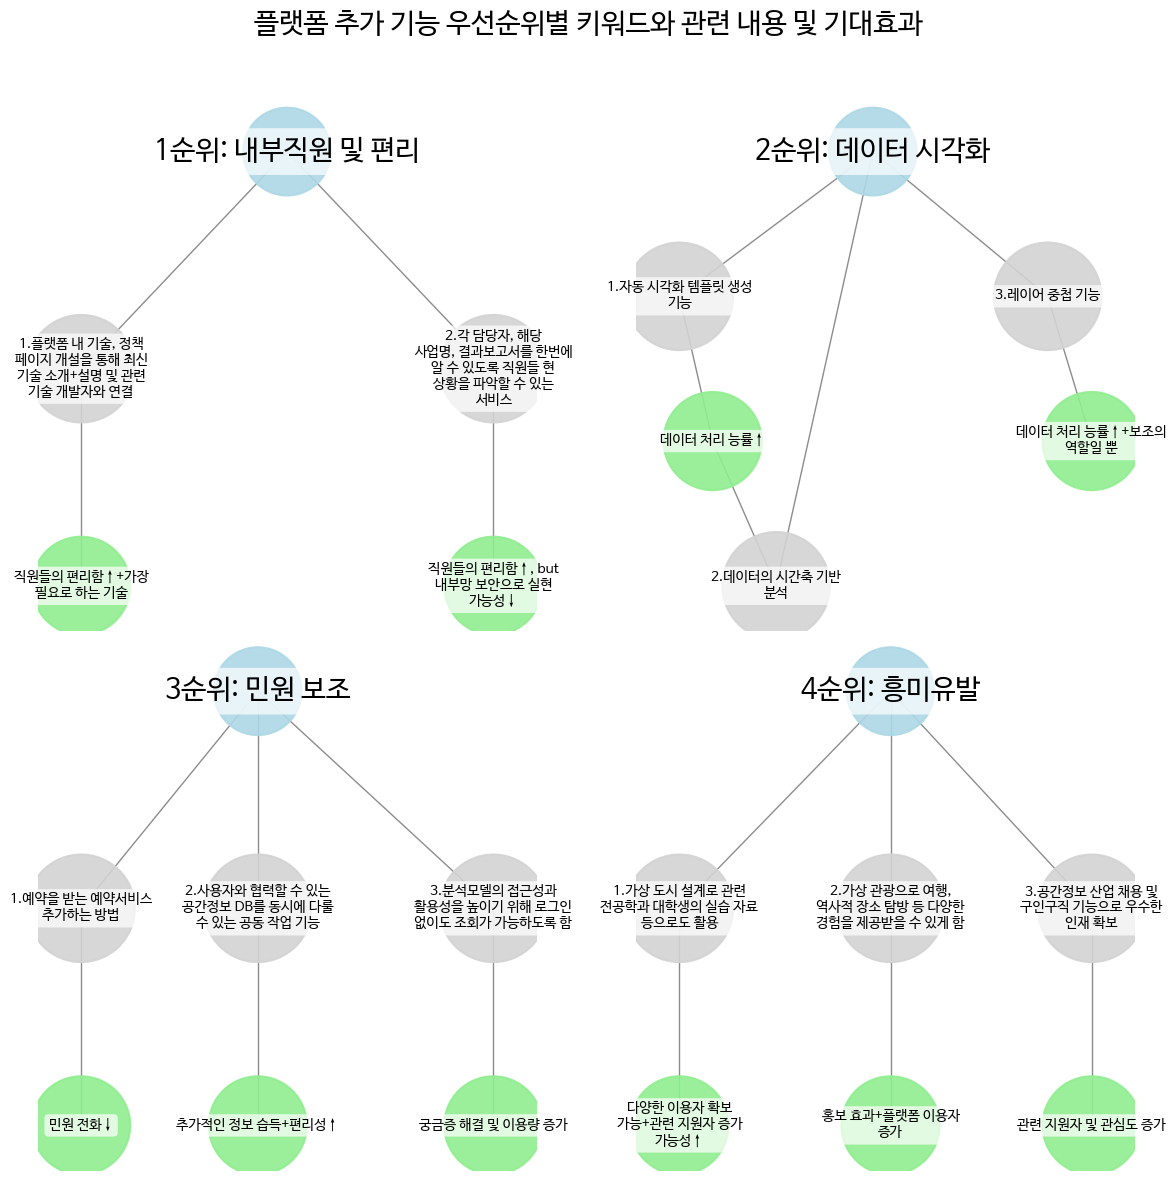

In [4]:
# subplot 설정 (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# 각 그래프에 대해 생성 및 그리기
for i, (category, items) in enumerate(data.items()):
    graph = create_graph({category: items})  # 각 순위에 대한 그래프 생성
    pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog="dot")  # 그래프 레이아웃 설정
    
    # 노드 크기와 색상 가져오기
    node_sizes = [graph.nodes[node]['size'] for node in graph.nodes]
    node_colors = [graph.nodes[node]['color'] for node in graph.nodes]
    
    ax = axes[i//2, i%2]  # subplot 위치 설정
    
    # 그래프 그리기
    nx.draw(
        graph, pos,
        ax=ax,
        with_labels=False,
        node_size=node_sizes,
        node_color=node_colors,
        edge_color="gray",
        linewidths=1.5,
        alpha=0.9
    )
    
    # 노드 레이블 추가
    texts = []
    for node, (x, y) in pos.items():
        wrapped_text = wrap_text(node)  # 텍스트 개행 처리
        texts.append(ax.text(
            x, y, s=wrapped_text,
            fontsize=10 if graph.nodes[node]['size'] >= 5000 else 20,  # 노드 크기에 따라 글씨 크기 조정
            fontweight="bold",
            ha='center',
            va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')
        ))

    ax.axis("off")

# 전체 제목
plt.suptitle("플랫폼 추가 기능 우선순위별 키워드와 관련 내용 및 기대효과", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # 상단 여백 조정
plt.savefig("C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\05.visualization\\5번-네트워크그래프.png", dpi=300, bbox_inches="tight")
plt.show()